# 1. Interface

In [2]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

In [3]:
cg = CoinGeckoAPI()

In [4]:
def get_crypto_data(crypto_id, start_date, end_date):
    cg = CoinGeckoAPI()
    
    # Convert start & end dates to UNIX timestamps (string)
    start_timestamp = pd.Timestamp(start_date).timestamp()
    end_timestamp = pd.Timestamp(end_date).timestamp()
    
    # Retrieve data from CoinGecko API
    data = cg.get_coin_market_chart_range_by_id(
        id = crypto_id,
        vs_currency = 'sgd',
        from_timestamp = int(start_timestamp),
        to_timestamp = int(end_timestamp)
    )
    
    # Extract prices, market_cap, and total_volume from the API response
    prices = data['prices']
    market_caps = data['market_caps']
    total_volumes = data['total_volumes']
    
    # Create a DF from the extracted data
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['market_cap'] = [item[1] for item in market_caps]
    df['total_volume'] = [item[1] for item in total_volumes]
    df.insert(0, "currency", crypto_id)
    
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    return df

## Example

In [8]:
crypto_id = 'ethereum'
start_date = '2023-01-01'
end_date = '2023-01-07'

eth_data = get_crypto_data(crypto_id, start_date, end_date)

print(eth_data)

     currency               timestamp        price    market_cap  total_volume
0    ethereum 2023-01-01 00:01:13.001  1603.937315  1.933151e+11  3.868993e+09
1    ethereum 2023-01-01 01:01:52.004  1602.667294  1.931265e+11  3.794993e+09
2    ethereum 2023-01-01 02:01:18.101  1603.855518  1.931529e+11  3.748884e+09
3    ethereum 2023-01-01 03:02:51.671  1603.552959  1.932594e+11  3.720931e+09
4    ethereum 2023-01-01 04:01:58.673  1601.284456  1.929705e+11  3.719349e+09
..        ...                     ...          ...           ...           ...
140  ethereum 2023-01-06 19:01:50.993  1692.435864  2.039809e+11  6.511536e+09
141  ethereum 2023-01-06 20:00:23.792  1703.242676  2.042846e+11  6.822255e+09
142  ethereum 2023-01-06 21:02:02.166  1691.417585  2.038579e+11  6.968614e+09
143  ethereum 2023-01-06 22:00:03.607  1691.700375  2.042325e+11  6.996201e+09
144  ethereum 2023-01-06 23:02:00.273  1697.669187  2.044670e+11  7.053155e+09

[145 rows x 5 columns]


In [9]:
crypto_id = 'bitcoin'
start_date = '2023-01-01'
end_date = '2023-01-07'

btc_data = get_crypto_data(crypto_id, start_date, end_date)

print(btc_data)

    currency               timestamp         price    market_cap  total_volume
0    bitcoin 2023-01-01 00:01:35.950  22176.585118  4.268527e+11  1.605929e+10
1    bitcoin 2023-01-01 01:01:45.941  22177.360048  4.267520e+11  1.566743e+10
2    bitcoin 2023-01-01 02:01:20.919  22197.458980  4.268669e+11  1.535767e+10
3    bitcoin 2023-01-01 03:01:55.335  22181.376603  4.270626e+11  1.422591e+10
4    bitcoin 2023-01-01 04:01:59.438  22172.230886  4.267860e+11  1.489095e+10
..       ...                     ...           ...           ...           ...
140  bitcoin 2023-01-06 19:00:10.153  22497.849360  4.333143e+11  2.285364e+10
141  bitcoin 2023-01-06 20:00:22.581  22660.146874  4.341661e+11  2.385642e+10
142  bitcoin 2023-01-06 21:02:03.953  22571.437193  4.346240e+11  2.504360e+10
143  bitcoin 2023-01-06 22:01:51.918  22607.278436  4.360042e+11  2.528994e+10
144  bitcoin 2023-01-06 23:01:48.725  22670.911123  4.365175e+11  2.554442e+10

[145 rows x 5 columns]


In [16]:
crypto_id = 'usd-coin'
start_date = '2023-01-01'
end_date = '2023-01-07'
usdc_data = get_crypto_data(crypto_id, start_date, end_date)

print(usdc_data)

     currency               timestamp     price    market_cap  total_volume
0    usd-coin 2023-01-01 00:01:05.384  1.341259  5.969449e+10  1.716111e+09
1    usd-coin 2023-01-01 01:00:46.256  1.342419  5.977973e+10  1.775669e+09
2    usd-coin 2023-01-01 02:01:42.877  1.342125  5.973994e+10  1.720631e+09
3    usd-coin 2023-01-01 03:00:54.554  1.341170  5.973694e+10  1.712648e+09
4    usd-coin 2023-01-01 04:02:00.029  1.341681  5.975733e+10  1.714498e+09
..        ...                     ...       ...           ...           ...
140  usd-coin 2023-01-06 19:01:50.782  1.335946  5.857851e+10  4.281710e+09
141  usd-coin 2023-01-06 20:00:17.385  1.337490  5.835104e+10  4.358574e+09
142  usd-coin 2023-01-06 21:01:11.562  1.335622  5.838513e+10  4.391716e+09
143  usd-coin 2023-01-06 22:01:55.260  1.335993  5.843568e+10  4.469213e+09
144  usd-coin 2023-01-06 23:02:00.474  1.337363  5.838041e+10  4.509209e+09

[145 rows x 5 columns]


In [14]:
crypto_id = 'axie-infinity'
start_date = '2023-01-01'
end_date = '2023-01-07'

axs_data = get_crypto_data(crypto_id, start_date, end_date)

print(axs_data)

          currency               timestamp     price    market_cap  \
0    axie-infinity 2023-01-01 00:00:54.207  8.115711  9.278040e+08   
1    axie-infinity 2023-01-01 01:02:06.668  8.063722  9.206810e+08   
2    axie-infinity 2023-01-01 02:01:04.983  8.050756  9.221630e+08   
3    axie-infinity 2023-01-01 03:00:56.576  8.075388  9.242131e+08   
4    axie-infinity 2023-01-01 04:01:59.204  8.088061  9.241949e+08   
..             ...                     ...       ...           ...   
140  axie-infinity 2023-01-06 19:01:52.007  8.901384  1.023550e+09   
141  axie-infinity 2023-01-06 20:02:12.537  9.083557  1.030953e+09   
142  axie-infinity 2023-01-06 21:01:25.655  8.974146  1.036864e+09   
143  axie-infinity 2023-01-06 22:01:19.114  8.989868  1.036306e+09   
144  axie-infinity 2023-01-06 23:00:10.071  9.133855  1.044304e+09   

     total_volume  
0    4.811464e+07  
1    4.861418e+07  
2    4.788654e+07  
3    4.771841e+07  
4    4.562652e+07  
..            ...  
140  6.531854e+07  

# 2.1 Plot Prices Against Timeframe

In [20]:
import matplotlib.pyplot as plt

In [21]:
def generate_line_plots_multiple_currencies(dataframes, combine_plots=True):
    if combine_plots:
        # Generate a single graph with multiple lines
        for df in dataframes:
            currency = df['currency'].iloc[0]
            plt.plot(df['timestamp'], df['price'], label=currency)

        plt.xlabel('Timestamp')
        plt.ylabel('SGD')
        plt.title('Cryptocurrency Prices')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
        
    else:
        # Generate separate line plots for each currency
        for df in dataframes:
            currency = df['currency'].iloc[0]
            plt.figure()
            plt.plot(df['timestamp'], df['price'])
            plt.xlabel('Timestamp')
            plt.ylabel('SGD')
            plt.title(f'Price for {currency}')         
            plt.show()

## Example

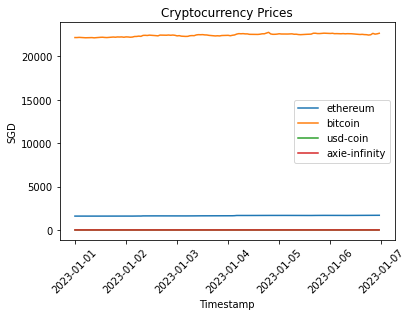

In [22]:
generate_line_plots_multiple_currencies([eth_data, btc_data, usdc_data, axs_data], combine_plots=True)

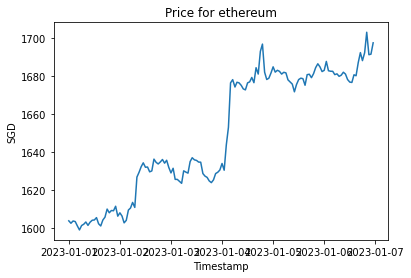

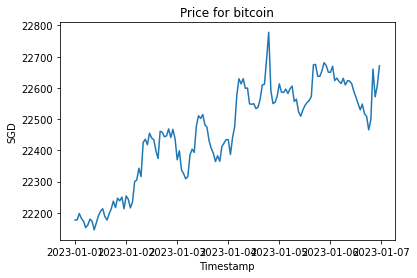

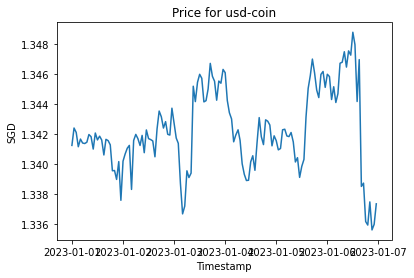

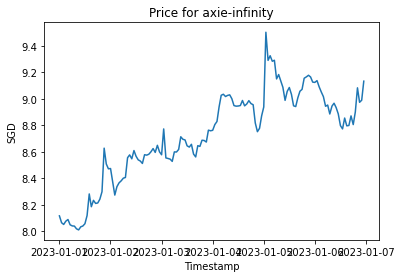

In [23]:
generate_line_plots_multiple_currencies([eth_data, btc_data, usdc_data, axs_data], combine_plots=False)

# 2.2 Plot Prices, Market Cap, and Total Volume for a Currency

In [24]:
import matplotlib.pyplot as plt

In [25]:
def generate_line_plot_single_currency(df, currency):
    # Create separate line plots for price, market cap, & total volume
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.plot(df['timestamp'], df['price'])
    plt.xlabel('Timestamp')
    plt.ylabel('SGD')
    plt.title(f'Price for {currency}')

    plt.subplot(3, 1, 2)
    plt.plot(df['timestamp'], df['market_cap'])
    plt.xlabel('Timestamp')
    plt.ylabel('Market Cap')
    plt.title(f'Market Cap for {currency}')

    plt.subplot(3, 1, 3)
    plt.plot(df['timestamp'], df['total_volume'])
    plt.xlabel('Timestamp')
    plt.ylabel('Total Volume')
    plt.title(f'Total Volume for {currency}')
    
    plt.tight_layout()
    plt.show()

## Example

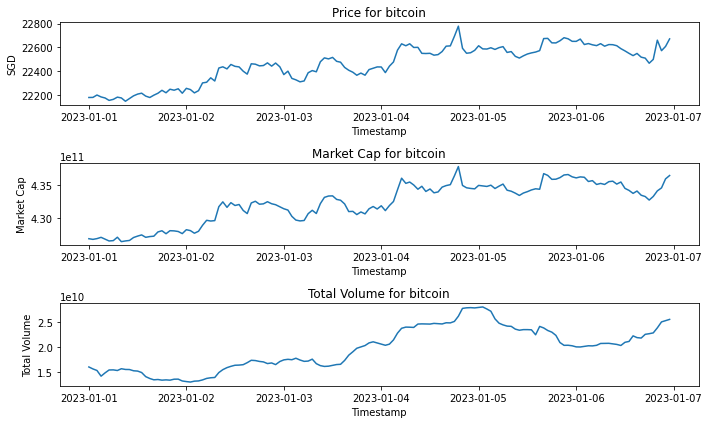

In [26]:
generate_line_plot_single_currency(btc_data, "bitcoin")

# 3. Pytests

In [36]:
import pytest
#from my_project import get_crypto_data, generate_line_plots_multiple_currencies, generate_line_plot_single_currency

@pytest.fixture
def example_data():
    # Set up example data for testing
    dataframes = [
        pd.DataFrame({
            'timestamp': [1, 2, 3],
            'price': [100, 200, 300],
            'market_cap': [1000, 2000, 3000],
            'total_volume': [10, 20, 30],
            'currency': ['ETH', 'BTC', 'USDC', 'AXS']
        }),
        pd.DataFrame({
            'timestamp': [4, 5, 6],
            'price': [400, 500, 600],
            'market_cap': [4000, 5000, 6000],
            'total_volume': [40, 50, 60],
            'currency': ['ETH', 'BTC', 'USDC', 'AXS']
        })
    ]
    return dataframes

def test_get_crypto_data():
    # Test the get_crypto_data function
    crypto_id = 'bitcoin'
    start_date = '2022-01-01'
    end_date = '2022-01-03'
    
    df = get_crypto_data(crypto_id, start_date, end_date)
    
    # Perform assertions to validate the output DataFrame
    assert isinstance(df, pd.DataFrame)
    assert df.shape == (3, 5)  # Modify the shape based on your expected output
    
    # Add more specific assertions as needed

def test_generate_line_plots_multiple_currencies(example_data):
    # Test the generate_line_plots_multiple_currencies function
    dataframes = example_data
    
    # Test combine_plots=True
    generate_line_plots_multiple_currencies(dataframes, combine_plots=True)
    # Add assertions to check the generated plot or other desired behavior
    
    # Test combine_plots=False
    generate_line_plots_multiple_currencies(dataframes, combine_plots=False)
    # Add assertions to check the generated plots or other desired behavior

def test_generate_line_plot_single_currency(example_data):
    # Test the generate_line_plot_single_currency function
    dataframes = example_data
    
    for df in dataframes:
        currency = df['currency'].iloc[0]
        
        generate_line_plot_single_currency(df, currency)
        # Add assertions to check the generated plot or other desired behavior
